<a href="https://colab.research.google.com/github/yuki-2000/Rocket/blob/main/rocket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

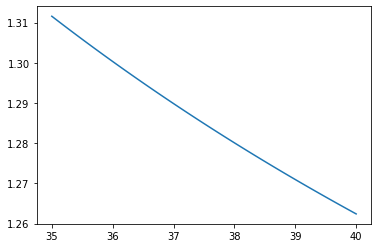

1.3003201315923973


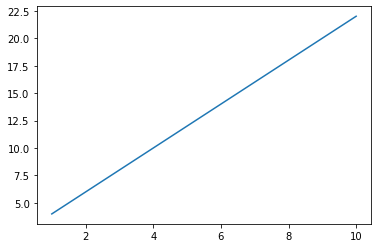

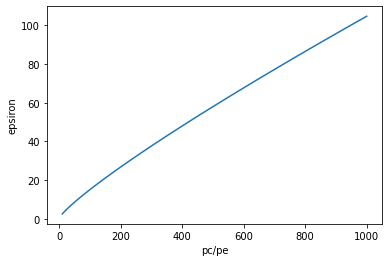

c*=  2438.190777996589


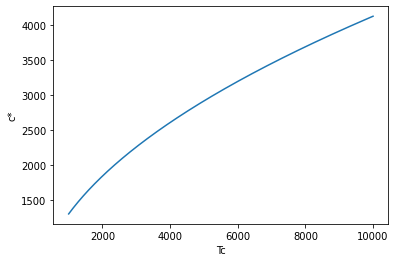

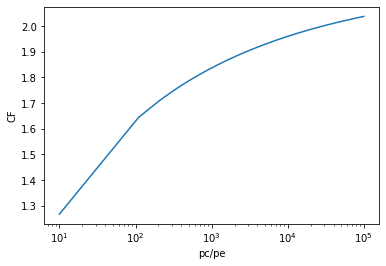

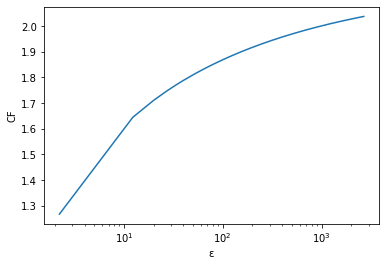

max Cf= 2.1829941537009283
max Isp= 523.32623010074
169.25109651044167


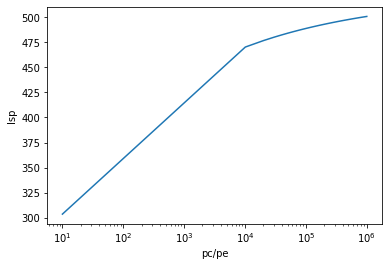

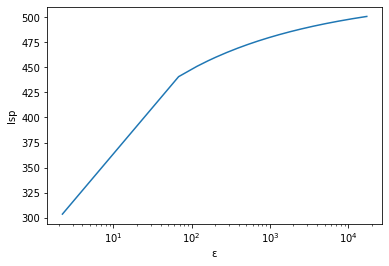

736.7980870164175


In [ ]:

import numpy as np
from matplotlib import pyplot as plt


# LOX/LH2

g = 9.81 #[m/s^2]
Ro = 8.31451 #[J/molK] 一般気体定数

#比熱比　仮においている
k = 1.217
M = 11.5
Tc = 3250



target_Isp = 481.85 #[s]
target_thrust = 100*g*(10**3)  #[N] 推力

#p15
w = target_thrust/(target_Isp*g) #推進薬質量流量[kg/s] wo(酸化剤流量)+wf(燃料流量)


#p18より適当に決めた p22に図ありp155
mixture_ratio = 6 #混合比 wo/wf 燃料と酸化剤の質量流量比






def gamma_from_cp(cp, Ro):
    return cp/(cp-Ro)


x = np.linspace(35,40,100)
y = gamma_from_cp(cp=x, Ro=Ro)

plt.plot(x, y)
plt.show()



print(gamma_from_cp(cp=36,Ro=Ro))






#　水生成後に、残った水素/酸素との平均分子量  ロケット推進工学p155
#p22と違うのはおそらくロケット推進工学p161より、酸素原子や水素原子も生じているから
def get_ave_molecular_weight(mixture_ratio):
    #水素が残るとき
    return 2*(1+mixture_ratio)
    
    #if mixture_ratio <= 8: 
        #return 2*(1+mixture_ratio)
    #if mixture_ratio > 8: 
        #  return 32*(1+mixture_ratio)/(8+mixture_ratio)
    

x = np.linspace(1,10,10)
y = np.zeros(10)
for i,xx in enumerate(x):
    y[i] = get_ave_molecular_weight(xx)
plt.plot(x, y)
plt.show()


ave_molecular_weight = get_ave_molecular_weight(mixture_ratio)










# 膨張比　p20 ロケット推進工学(3-25) 3-35が普通、100km以上では40-100,400もあり
#ラバールノズルのことを考えた式
def get_expansion_ratio(k, pc, pe):
    a = 2/(k+1)
    a = a** (1/(k-1))
    b = pc/pe
    b = b**(1/k)
    c = (k+1)/(k-1)
    d = 1- (pe/pc)**((k-1)/k)
    ratio = a*b /np.sqrt(c*d)
    return ratio


x = np.linspace(10,1000,100)
y = get_expansion_ratio(k=1.1, pc=x, pe=1)


plt.xlabel("pc/pe")
plt.ylabel("epsiron")
plt.plot(x, y)
plt.show()
















#p16 [m/s]
#Jとgの関係で1000をかけている
def get_c_star(k, M, Ro, Tc):
    a = 1000*Ro*Tc/M
    index = (k+1)/(k-1)
    b = k * (2/(k+1))**index
    
    c = np.sqrt(a) / np.sqrt(b)
    
    return c


print("c*= ", get_c_star(k=1.25, M=8, Ro=Ro, Tc=2477))



x = np.linspace(1000,10000,1000)
y = get_c_star(k, M, Ro, Tc=x)
plt.xlabel("Tc")
plt.ylabel("c*")
plt.plot(x, y)
plt.show()













#p20 推力係数　p54(3-30) 123は
#pe: emmission, pc: combustion, pa: atomosphere eps:ε 
def get_CF(k,pe,pc,pa):
    a = 2*k*k /(k-1)
    index1 = (k+1)/(k-1)
    b = (2/(k+1))**index1
    index2 = (k-1)/k
    c = 1-(pe/pc)**index2
    d = (pe-pa)/pc
    
    eps = get_expansion_ratio(k, pc, pe)
    
    cf = np.sqrt(a*b*c) + eps*d
    return cf


#p19のグラフはこれのεバージョンか？媒介変数で行けるか？
x = np.linspace(10,100000,1000)
y = get_CF(k,pe=1,pc=x,pa=1)
plt.xscale('log')
plt.xlabel("pc/pe")
plt.ylabel("CF")
plt.plot(x, y)
plt.show()


xr = get_expansion_ratio(k, pc=x, pe=1)
y = get_CF(k,pe=1,pc=x,pa=1)
plt.xscale('log')
plt.xlabel("ε")
plt.ylabel("CF")
plt.plot(xr, y)
plt.show()






#pe/pc=0の時最高
def get_CFmax(k):
    a = 2*k*k /(k-1)
    index1 = (k+1)/(k-1)
    b = (2/(k+1))**index1

    cfmax = np.sqrt(a*b) 
    return cfmax



print("max Cf=", get_CFmax(k))
print("max Isp=", get_CFmax(k) * get_c_star(k, M, Ro, Tc) /g)


#23 pe = paとしている [s]
def get_Isp(k, M, Tc, Ro, g, pe, pc):
    a = 2*k/(k-1)
    #Jとgの関係で1000をかけている
    b = Ro*1000/M
    index = (k-1)/k
    c = 1- (pe/pc)**index
    
    isp = (1/g) * np.sqrt(a*b*Tc*c) 
    
    return isp
    
    

print(get_Isp(k=k, M=ave_molecular_weight, Tc=1000, pe=5, pc=100, Ro=Ro, g=g))



x = np.linspace(10,1000000,100)
y = get_Isp(k, M, Tc, Ro, g, pe=1, pc=x)

plt.xscale('log')
plt.xlabel("pc/pe")
plt.ylabel("Isp")
plt.plot(x, y)
plt.show()




x = np.linspace(10,1000000,1000)
xr = get_expansion_ratio(k, pc=x, pe=1)
y = get_Isp(k, M, Tc, Ro, g, pe=1, pc=x)

plt.xscale('log')
plt.xlabel("ε")
plt.ylabel("Isp")
plt.plot(xr, y)
plt.show()

    









    


target_CF = g*target_Isp/2438



print(get_expansion_ratio(k=1.25,pc=25000,pe=1))












#p17より読み取り

Pcns = 1000 #[psi] 6.9MPa
mixture_ratio = 4.83
k=1.217
Tc = 2977.778 +273  #5392F 
M = 11.5


c_star= get_c_star(k, M, Ro, Tc)


#23 pe = paとしている [s]
prop_Isp = get_Isp(k, M, Tc, Ro, g, pe=1, pc=800)
#prop_Isp = get_Isp(k=k, M=M, Tc=Tc, Ro=Ro, g=g, pe=1, pc=800)
prop_eps = get_expansion_ratio(k, pc=800, pe=1)



In [ ]:
g = 9.81

#p17より読み取り
Pcns = 6.9 #[MPa] 1000[psi] 6.9MPa
mixture_ratio = 4.83
Tc = 2977.778 +273  #5392F 
c_star = 2385.974 #7828*0.3048 #[m]

#k = 1.218 #表から読み取るしかない
k = 1.113 #プラットアンドホイットニーのispに合わせた結果

#pe/pc=0の時最高
CF_max = get_CFmax(k)
Isp_max = CF_max * c_star/g
print("Isp_max:",Isp_max)




target_Isp = 481.85 #[s]
target_thrust = 100*g*(10**3)  #[N] 推力


def solve_pc(pc):
  Cf = get_CF(k,pe=1,pc=pc,pa=1)
  Isp = Cf * c_star/g
  diff_Isp = Isp - target_Isp
  return diff_Isp




from scipy import optimize 


result_pc_pe = optimize.bisect(solve_pc, 2,100000)
result_eps = get_expansion_ratio(k, pc=target_pc, pe=1)

print("pc/pe=",result_pc_pe)
print("ε=",result_eps)



result_pe = Pcns / result_pc_pe
#表3-2
print(result_pe)
print(result_pe/0.1013)
print("高度高度30kmあたり")







#ちなみに
def solve_pc_pe(pc_pe):
  eps = 40
  return eps - get_expansion_ratio(k, pc=pc_pe, pe=1)

  
pc_pe_40 = optimize.bisect(solve_pc_pe, 2,100000)
print(pc_pe_40)
print(get_expansion_ratio(k, pc=pc_pe_40, pe=1))

Isp_40 = get_CF(k,pe=1,pc=pc_pe_40,pa=1) * c_star/g
print("eps=40 Isp=", Isp_40)

Isp_max: 681.2372131496721
pc/pe= 927.9937351185766
ε= 1171.7710094479091
0.007435395023564826
0.07339975344091634
高度高度30kmあたり
339.7501140198534
40.00000000000002
eps=40 Isp= 455.27192335530316
